# ZCB with Vasicek

In [1]:
import matplotlib.pyplot as plt
from exact_zcb import *

In [2]:
Ts = np.r_[0.0:25.5:0.5]
zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

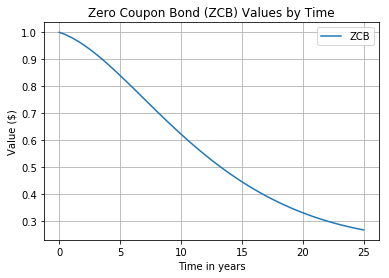

In [3]:
plt.title("Zero Coupon Bond (ZCB) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)

# Exercise value

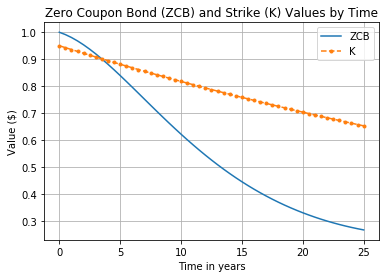

In [4]:
Ks = [exercise_value(0.95, 0.015, t) for t in Ts]
plt.title("Zero Coupon Bond (ZCB) "
              "and Strike (K) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.plot(Ts, Ks, label='K', linestyle="--", marker=".")
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)

# Vasicek CZCB

In [5]:
from VasicekCZCB import *

In [6]:
def iMain():
    r0 = 0.05
    R = 0.05
    ratio = 0.95
    sigma = 0.03
    kappa = 0.15
    theta = 0.05
    prob = 1e-6
    M = 250
    max_policy_iter=10
    grid_struct_interval = 0.25
    rs = np.r_[0.0:2.0:0.1]    
    
    
    Vasicek = VasicekCZCB()
    r, vals = Vasicek.vasicek_czcb_values(r0, R, ratio, 1.,
                                          sigma, kappa, theta,
                                          M, prob,
                                          max_policy_iter,
                                          grid_struct_interval,
                                          rs)
    
    plt.title("Callable Zero Coupon Bond Values by r")
    plt.plot(r, vals, label='1 yr')

    for T in [5., 7., 10., 20.]:
        r, vals = \
            Vasicek.vasicek_czcb_values(r0, R, ratio, T,
                                        sigma, kappa,
                                        theta, M, prob,
                                        max_policy_iter,
                                        grid_struct_interval,
                                        rs)
        plt.plot(r, vals, label=str(T)+' yr',
                 linestyle="--", marker=".")

    plt.ylabel("Value ($)")
    plt.xlabel("r")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    

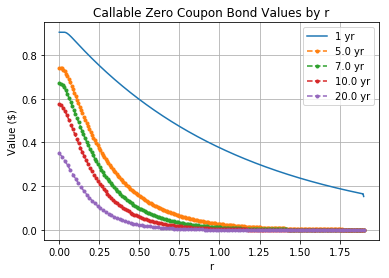

In [7]:
iMain()